<a href="https://www.kaggle.com/code/nortonperez/csci-331-digit-recognizer-notebook?scriptVersionId=155321272" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# General imports and files

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import matplotlib.pyplot as plt
import os

print("Working directory: "+ os.getcwd())
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print("\t" + os.path.join(dirname, filename))

Working directory: /kaggle/working
	/kaggle/input/digit-recognizer/sample_submission.csv
	/kaggle/input/digit-recognizer/train.csv
	/kaggle/input/digit-recognizer/test.csv


<span style="font-size:18px;">
We have 3 important files that will provide help in training and testing a model
</span>

# Sample of pixel images
<span style="font-size:18px;">
The images are 28x28 pixels and range from 0 to 255, where 0 is black and 255 is white. The train data is organized so that the first column is the label (or the expected number), followed by information about the 784 pixels. There is an example below.
</span>

In [2]:
trainDataFrame = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
trainDataFrame.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Sample image:


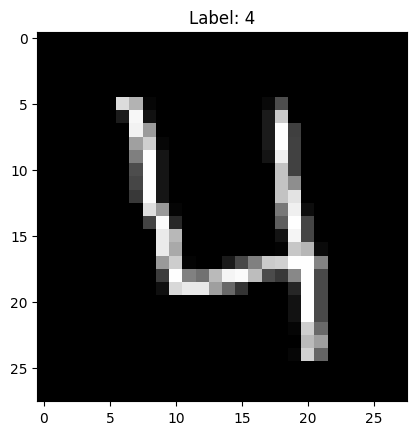

In [3]:
plt.title("Label: " + str(trainDataFrame.iloc[3,0])) 
print("Sample image:")
plt.imshow(np.asarray(trainDataFrame.iloc[3,1:]).reshape(28,28),cmap="gray",vmin=0,vmax=255)

# Set up
<span style="font-size:18px;">
We will have two shared variables that will be used in both models. The first variable is the prediction target also know as y. The second variable is the features (called X) which is all the columns besides the label.
</span>

In [4]:
X = trainDataFrame.drop("label",axis=1)
y = trainDataFrame.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# First model
<span style="font-size:18px;">
The first model is Random Forest.
</span>

Random Forest Accuracy: 0.9628571428571429


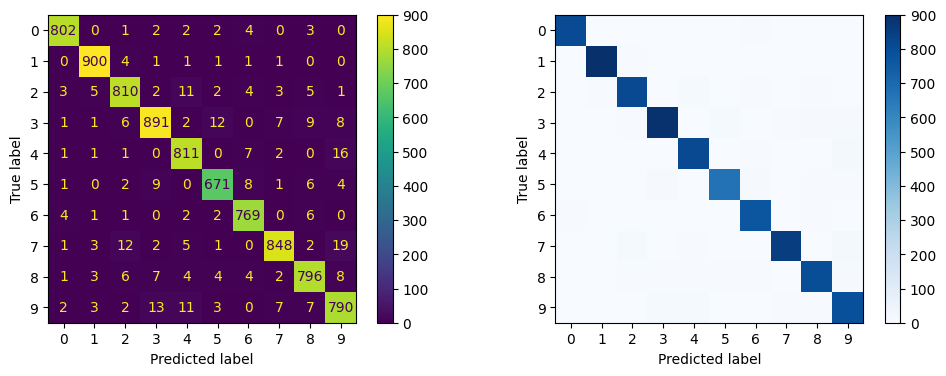

In [5]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Random Forest Accuracy:", acc)

fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
ConfusionMatrixDisplay(conf_matrix).plot(ax=axarr[0])
ConfusionMatrixDisplay(conf_matrix).plot(ax=axarr[1],cmap=plt.cm.Blues,include_values=False)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       816
           1       0.98      0.99      0.99       909
           2       0.96      0.96      0.96       846
           3       0.96      0.95      0.96       937
           4       0.96      0.97      0.96       839
           5       0.96      0.96      0.96       702
           6       0.96      0.98      0.97       785
           7       0.97      0.95      0.96       893
           8       0.95      0.95      0.95       835
           9       0.93      0.94      0.94       838

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



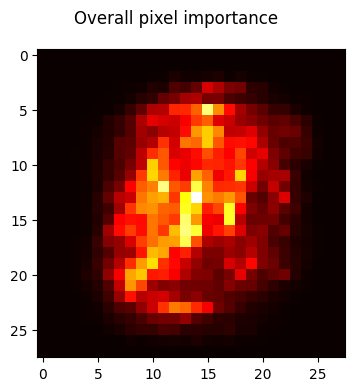

In [6]:
print(classification_report(y_test, y_pred))
coef = rf_model.feature_importances_
coef.resize(28,28)
plt.figure(figsize=(12, 4))
scale = coef.max()
plt.suptitle("Overall pixel importance")
plt.imshow(coef,interpolation="nearest",cmap=plt.cm.hot,vmin=0,vmax=scale)
plt.show()

# Second model
<span style="font-size:18px;">
The second model is Logistic Regression.
</span>

Logistic Regression Accuracy: 0.9023809523809524


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


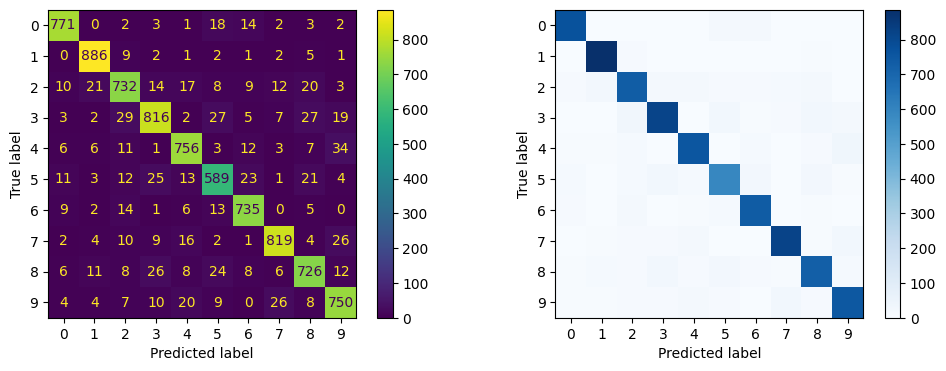

In [7]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Logistic Regression Accuracy:", acc)

fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
ConfusionMatrixDisplay(conf_matrix).plot(ax=axarr[0])
ConfusionMatrixDisplay(conf_matrix).plot(ax=axarr[1],cmap=plt.cm.Blues,include_values=False)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       816
           1       0.94      0.97      0.96       909
           2       0.88      0.87      0.87       846
           3       0.90      0.87      0.89       937
           4       0.90      0.90      0.90       839
           5       0.85      0.84      0.84       702
           6       0.91      0.94      0.92       785
           7       0.93      0.92      0.92       893
           8       0.88      0.87      0.87       835
           9       0.88      0.89      0.89       838

    accuracy                           0.90      8400
   macro avg       0.90      0.90      0.90      8400
weighted avg       0.90      0.90      0.90      8400



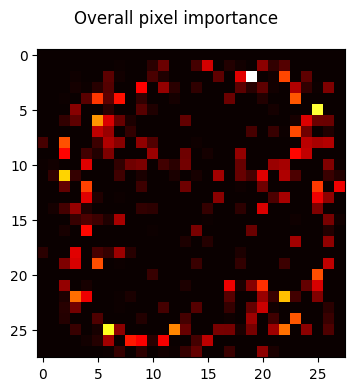

In [8]:
print(classification_report(y_test, y_pred))
coef = lr_model.coef_.copy()
coef = np.array(coef).sum(axis=0)
coef.resize(28,28)
plt.figure(figsize=(12, 4))
scale = coef.max()
plt.suptitle("Overall pixel importance")
plt.imshow(coef,interpolation="nearest",cmap=plt.cm.hot,vmin=0,vmax=scale)
plt.show()